In [1]:
import sys
sys.path.append("../")

from utility.potential import *
from utility.propagation import *
from tqdm import tqdm # type: ignore

if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

# Animations

In [7]:
print("j init: 0, omega init: 0, j_tot: 150")
propagation = Propagation("standard_0_0", 0, 0, 150)
propagation.config.animation = AnimationConfig.All
propagation = propagation.into_split()

propagation.propagate()
print(propagation.get_losses())
propagation.save_savers()

j init: 0, omega init: 0, j_tot: 150
[0.13303160751633436, 0.05918912498304696]


In [6]:
print("j init: 1, omega init: 0, j_tot: 150")
propagation = Propagation("standard_1_0", 1, 0, 150)
propagation.config.animation = AnimationConfig.All
propagation = propagation.into_split()

propagation.propagate()
print(propagation.get_losses())
propagation.save_savers()

j init: 1, omega init: 0, j_tot: 150
[0.1829969537575593, 0.0562377597748811]


In [7]:
print("j init: 1, omega init: 1, j_tot: 150")
propagation = Propagation("standard_1_1", 1, 1, 150)
propagation.config.animation = AnimationConfig.All
propagation = propagation.into_split()

propagation.propagate()
print(propagation.get_losses())
propagation.save_savers()

j init: 1, omega init: 1, j_tot: 150
[0.10805345243546916, 0.060667835221461686]


In [15]:
j = 0

for omega in tqdm(range(j + 1)):
    propagation = Propagation(f"standard_{j}_{omega}", j, omega, 10)
    propagation.config.animation = AnimationConfig.Polar
    propagation.provider.transform_gamma = 0.
    propagation = propagation.into_split()

    propagation.propagate()
    propagation.save_savers()


100%|██████████| 1/1 [00:01<00:00,  1.66s/it]


In [8]:
print("j init: 0, omega init: 0, j_tot: 150")
propagation = Propagation("small_rot_scaling", 0, 0, 150)
propagation.config.animation = AnimationConfig.All
propagation.params.rot_const = 9.243165268327e-9
propagation = propagation.into_split()

propagation.propagate()
print(propagation.get_losses())
propagation.save_savers()

j init: 0, omega init: 0, j_tot: 150
[0.1447736709386087, 0.06355082082058716]


In [9]:
print("j init: 0, omega init: 0, j_tot: 150")
propagation = Propagation("big_rot_scaling", 0, 0, 150)
propagation.config.animation = AnimationConfig.All
propagation.params.rot_const = 9.243165268327e-5
propagation = propagation.into_split()

propagation.propagate()
print(propagation.get_losses())
propagation.save_savers()

j init: 0, omega init: 0, j_tot: 150
[0.11065577858275077, 0.04660656797104301]


# Single cross sections

In [ ]:
j_omega_pairs = [(0, 0), (1, 0), (1, 1)]

energy_kelvin = 3700
for j_init, omega_init in j_omega_pairs:
    losses = CumulativeLosses(j_init, energy_kelvin)
    
    for j_tot in tqdm(losses.j_totals):
        propagation = Propagation("standard", j_init, omega_init, j_tot)
        propagation.params.energy_kelvin = energy_kelvin
        propagation = propagation.into_split()

        propagation.propagate()
        losses.extract_loss(propagation)
        
    losses.save_losses(f"losses_{energy_kelvin}_{j_init}_{omega_init}")

100%|██████████| 50/50 [01:18<00:00,  1.57s/it]


In [19]:
j_init = 2
energy_kelvin = 3700

for omega_init in range(j_init + 1):
    losses = CumulativeLosses(j_init, energy_kelvin)
    
    for j_tot in tqdm(losses.j_totals):
        propagation = Propagation("standard", j_init, omega_init, j_tot)
        propagation.params.energy_kelvin = energy_kelvin
        propagation = propagation.into_split()

        propagation.propagate()
        losses.extract_loss(propagation)
        
    losses.save_losses(f"losses_{energy_kelvin}_{j_init}_{omega_init}")


100%|██████████| 50/50 [01:17<00:00,  1.56s/it]


# Cross sections - energy dependence 

In [2]:
j_omega_pairs = [(0, 0), (1, 0), (1, 1)]
energies = [500, 1000, 2000, 3000, 4000, 5000]

In [3]:
for j_init, omega_init in j_omega_pairs:
    for energy_kelvin in energies:
        print("energy", energy_kelvin)
        losses = CumulativeLosses(j_init, energy_kelvin)

        for j_tot in tqdm(losses.j_totals):
            propagation = Propagation("standard", j_init, omega_init, j_tot)
            propagation.config.time_step *= np.sqrt(propagation.params.energy_kelvin / energy_kelvin)
            propagation.params.energy_kelvin = energy_kelvin
            propagation = propagation.into_split()

            propagation.propagate()
            losses.extract_loss(propagation)
        losses.save_losses(f"losses_{energy_kelvin}_{j_init}_{omega_init}")

energy 500


100%|██████████| 50/50 [00:22<00:00,  2.26it/s]


energy 1000


100%|██████████| 50/50 [00:22<00:00,  2.27it/s]


energy 2000


100%|██████████| 50/50 [00:21<00:00,  2.28it/s]


energy 3000


100%|██████████| 50/50 [00:21<00:00,  2.30it/s]


energy 4000


100%|██████████| 50/50 [00:21<00:00,  2.36it/s]


energy 5000


100%|██████████| 50/50 [00:21<00:00,  2.35it/s]


energy 500


100%|██████████| 50/50 [00:21<00:00,  2.35it/s]


energy 1000


100%|██████████| 50/50 [00:21<00:00,  2.35it/s]


energy 2000


100%|██████████| 50/50 [00:20<00:00,  2.43it/s]


energy 3000


100%|██████████| 50/50 [00:20<00:00,  2.40it/s]


energy 4000


100%|██████████| 50/50 [00:21<00:00,  2.37it/s]


energy 5000


100%|██████████| 50/50 [00:21<00:00,  2.38it/s]


energy 500


100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


energy 1000


100%|██████████| 50/50 [00:20<00:00,  2.41it/s]


energy 2000


100%|██████████| 50/50 [00:21<00:00,  2.36it/s]


energy 3000


100%|██████████| 50/50 [00:21<00:00,  2.35it/s]


energy 4000


100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


energy 5000


100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


# Convergences 

In [7]:
j_omega_pairs = [(0, 0), (1, 0), (1, 1)]

## Time step

In [ ]:
time_steps = [5., 10., 20., 50., 100., 200., 400.]

for j_init, omega_init in j_omega_pairs:
    for time_step in time_steps:
        print("time_step", time_step)
        losses = CumulativeLosses(j_init)
        
        for j_tot in tqdm(losses.j_totals):
            propagation = Propagation("standard", j_init, omega_init, j_tot)
            propagation.config.steps_no = int(propagation.config.steps_no * propagation.config.time_step / time_step)
            propagation.config.time_step = time_step
            propagation = propagation.into_split()

            propagation.propagate()
            losses.extract_loss(propagation)
        losses.save_losses(f"time_step_{time_step}_{j_init}_{omega_init}")

time_step 800.0


100%|██████████| 50/50 [00:07<00:00,  6.53it/s]


time_step 1600.0


100%|██████████| 50/50 [00:05<00:00,  9.17it/s]


time_step 800.0


100%|██████████| 50/50 [00:07<00:00,  6.47it/s]


time_step 1600.0


100%|██████████| 50/50 [00:05<00:00,  9.22it/s]


time_step 800.0


100%|██████████| 50/50 [00:07<00:00,  6.52it/s]


time_step 1600.0


100%|██████████| 50/50 [00:05<00:00,  9.28it/s]


## radial grid

In [8]:
r_sizes = [128, 256, 512, 1024, 2048, 4096]

for j_init, omega_init in j_omega_pairs:
    for r_no in r_sizes:
        print("radial_no", r_no)
        losses = CumulativeLosses(j_init)

        for j_tot in tqdm(losses.j_totals):
            propagation = Propagation("standard", j_init, omega_init, j_tot)
            propagation.config.r_no = r_no
            propagation = propagation.into_split()

            propagation.propagate()
            losses.extract_loss(propagation)
        losses.save_losses(f"radial_scaling_{r_no}_{j_init}_{omega_init}")

radial_no 128


100%|██████████| 50/50 [00:09<00:00,  5.44it/s]


radial_no 256


100%|██████████| 50/50 [00:13<00:00,  3.63it/s]


radial_no 512


100%|██████████| 50/50 [00:20<00:00,  2.43it/s]


radial_no 1024


100%|██████████| 50/50 [00:34<00:00,  1.44it/s]


radial_no 2048


100%|██████████| 50/50 [01:11<00:00,  1.43s/it]


radial_no 4096


100%|██████████| 50/50 [02:09<00:00,  2.58s/it]


radial_no 128


100%|██████████| 50/50 [00:09<00:00,  5.47it/s]


radial_no 256


100%|██████████| 50/50 [00:13<00:00,  3.58it/s]


radial_no 512


100%|██████████| 50/50 [00:21<00:00,  2.36it/s]


radial_no 1024


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


radial_no 2048


100%|██████████| 50/50 [01:11<00:00,  1.43s/it]


radial_no 4096


100%|██████████| 50/50 [02:07<00:00,  2.55s/it]


radial_no 128


100%|██████████| 50/50 [00:08<00:00,  5.59it/s]


radial_no 256


100%|██████████| 50/50 [00:13<00:00,  3.65it/s]


radial_no 512


100%|██████████| 50/50 [00:21<00:00,  2.33it/s]


radial_no 1024


100%|██████████| 50/50 [00:37<00:00,  1.34it/s]


radial_no 2048


100%|██████████| 50/50 [01:14<00:00,  1.49s/it]


radial_no 4096


100%|██████████| 50/50 [02:10<00:00,  2.60s/it]


## polar grid

In [9]:
polar_sizes = [32, 64, 128, 256, 512]

for j_init, omega_init in j_omega_pairs:
    for polar_no in polar_sizes:
        print("polar_no", polar_no)
        losses = CumulativeLosses(j_init)

        for j_tot in tqdm(losses.j_totals):
            propagation = Propagation("standard", j_init, omega_init, j_tot)
            propagation.config.polar_no = polar_no
            propagation = propagation.into_split()

            propagation.propagate()
            losses.extract_loss(propagation)
        losses.save_losses(f"polar_scaling_{polar_no}_{j_init}_{omega_init}")

polar_no 32


100%|██████████| 50/50 [00:07<00:00,  6.99it/s]


polar_no 64


100%|██████████| 50/50 [00:11<00:00,  4.30it/s]


polar_no 128


100%|██████████| 50/50 [00:21<00:00,  2.32it/s]


polar_no 256


100%|██████████| 50/50 [00:50<00:00,  1.02s/it]


polar_no 512


100%|██████████| 50/50 [02:23<00:00,  2.86s/it]


polar_no 32


100%|██████████| 50/50 [00:07<00:00,  7.11it/s]


polar_no 64


100%|██████████| 50/50 [00:11<00:00,  4.34it/s]


polar_no 128


100%|██████████| 50/50 [00:21<00:00,  2.38it/s]


polar_no 256


100%|██████████| 50/50 [00:51<00:00,  1.03s/it]


polar_no 512


100%|██████████| 50/50 [02:20<00:00,  2.81s/it]


polar_no 32


100%|██████████| 50/50 [00:06<00:00,  7.25it/s]


polar_no 64


100%|██████████| 50/50 [00:11<00:00,  4.33it/s]


polar_no 128


100%|██████████| 50/50 [00:21<00:00,  2.33it/s]


polar_no 256


100%|██████████| 50/50 [00:50<00:00,  1.01s/it]


polar_no 512


100%|██████████| 50/50 [02:15<00:00,  2.70s/it]


## wave width

In [10]:
widths = [0.1, 0.3, 0.6, 1, 2, 4]

for j_init, omega_init in j_omega_pairs:
    for width in widths:
        print("wave width", width)
        losses = CumulativeLosses(j_init)

        for j_tot in tqdm(losses.j_totals):
            propagation = Propagation("standard", j_init, omega_init, j_tot)
            propagation.params.wave_r_sigma = width
            propagation = propagation.into_split()

            propagation.propagate()
            losses.extract_loss(propagation)
        losses.save_losses(f"width_scaling_{width}_{j_init}_{omega_init}")

wave width 0.1


100%|██████████| 50/50 [00:20<00:00,  2.42it/s]


wave width 0.3


100%|██████████| 50/50 [00:20<00:00,  2.40it/s]


wave width 0.6


100%|██████████| 50/50 [00:20<00:00,  2.40it/s]


wave width 1


100%|██████████| 50/50 [00:20<00:00,  2.42it/s]


wave width 2


100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


wave width 4


100%|██████████| 50/50 [00:20<00:00,  2.41it/s]


wave width 0.1


100%|██████████| 50/50 [00:21<00:00,  2.38it/s]


wave width 0.3


100%|██████████| 50/50 [00:20<00:00,  2.40it/s]


wave width 0.6


100%|██████████| 50/50 [00:20<00:00,  2.42it/s]


wave width 1


100%|██████████| 50/50 [00:21<00:00,  2.36it/s]


wave width 2


100%|██████████| 50/50 [00:20<00:00,  2.41it/s]


wave width 4


100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


wave width 0.1


100%|██████████| 50/50 [00:20<00:00,  2.40it/s]


wave width 0.3


100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


wave width 0.6


100%|██████████| 50/50 [00:20<00:00,  2.38it/s]


wave width 1


100%|██████████| 50/50 [00:21<00:00,  2.33it/s]


wave width 2


100%|██████████| 50/50 [00:21<00:00,  2.32it/s]


wave width 4


100%|██████████| 50/50 [00:21<00:00,  2.33it/s]


## Coriolis time step

In [ ]:
time_steps = [100., 200., 400., 800., 1600.]

for j_init, omega_init in j_omega_pairs:
    for time_step in time_steps:
        print("time_step", time_step)
        losses = CumulativeLosses(j_init)
        
        for j_tot in tqdm(losses.j_totals):
            propagation = Propagation("standard", j_init, omega_init, j_tot)
            propagation.config.coriolis_omega_max = 2
            propagation.config.steps_no = int(propagation.config.steps_no * propagation.config.time_step / time_step)
            propagation.config.time_step = time_step
            propagation = propagation.into_split()

            propagation.propagate()
            losses.extract_loss(propagation)
        losses.save_losses(f"coriolis_time_step_{time_step}_{j_init}_{omega_init}")

time_step 1600.0


100%|██████████| 50/50 [01:01<00:00,  1.23s/it]


time_step 1600.0


100%|██████████| 50/50 [01:00<00:00,  1.22s/it]


time_step 1600.0


100%|██████████| 50/50 [01:00<00:00,  1.21s/it]


## Potential scalings

In [ ]:
scalings = [0.2, 0.5, 2, 5]

def propagte_scaled(prefix: str, potential: Potential):
    print("j = 0")
    losses = CumulativeLosses(0)
        
    for j_tot in tqdm(losses.j_totals):
        propagation = Propagation("standard", 0, 0, j_tot)
        propagation.provider.potential = potential
        propagation = propagation.into_split()

        propagation.propagate()
        losses.extract_loss(propagation)
    losses.save_losses(f"{prefix}_0_0")

    print("j = 1, omega = 0")
    losses = CumulativeLosses(1)
        
    for j_tot in tqdm(losses.j_totals):
        propagation = Propagation("standard", 1, 0, j_tot)
        propagation.provider.potential = potential
        propagation = propagation.into_split()

        propagation.propagate()
        losses.extract_loss(propagation)
    losses.save_losses(f"{prefix}_1_0")

    print("j = 1, omega = 1")
    losses = CumulativeLosses(1)
        
    for j_tot in tqdm(losses.j_totals):
        propagation = Propagation("standard", 1, 1, j_tot)
        propagation.provider.potential = potential
        propagation = propagation.into_split()

        propagation.propagate()
        losses.extract_loss(propagation)
    losses.save_losses(f"{prefix}_1_1")

In [ ]:
for scaling in scalings:
    print("dipole scaling", scaling)
    potential = ForceField.fitted()
    potential.alpha *= scaling
    fig, ax = potential.show()

    propagte_scaled(f"dipole_scaling_{scaling}", potential)


In [ ]:
for scaling in scalings:
    print("repulsive O scaling", scaling)
    potential = ForceField.fitted()
    potential.rep_o *= scaling
    fig, ax = potential.show()

    propagte_scaled(f"rep_o_scaling_{scaling}", potential)

for scaling in scalings:
    print("repulsive C scaling", scaling)
    potential = ForceField.fitted()
    potential.rep_c *= scaling
    fig, ax = potential.show()

    propagte_scaled(f"rep_c_scaling_{scaling}", potential)

for scaling in scalings:
    print("repulsive S scaling", scaling)
    potential = ForceField.fitted()
    potential.rep_s *= scaling
    fig, ax = potential.show()

    propagte_scaled(f"rep_s_scaling_{scaling}", potential)


In [ ]:
for scaling in scalings:
    print("attractive O scaling", scaling)
    potential = ForceField.fitted()
    potential.attr_o *= scaling
    fig, ax = potential.show()

    propagte_scaled(f"attr_o_scaling_{scaling}", potential)

for scaling in scalings:
    print("attractive C scaling", scaling)
    potential = ForceField.fitted()
    potential.attr_c *= scaling
    fig, ax = potential.show()

    propagte_scaled(f"attr_c_scaling_{scaling}", potential)

for scaling in scalings:
    print("attractive S scaling", scaling)
    potential = ForceField.fitted()
    potential.attr_s *= scaling
    fig, ax = potential.show()

    propagte_scaled(f"attr_s_scaling_{scaling}", potential)


### With force field not fitted to data

j = 1, omega = 0


100%|██████████| 50/50 [00:21<00:00,  2.32it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:21<00:00,  2.35it/s]


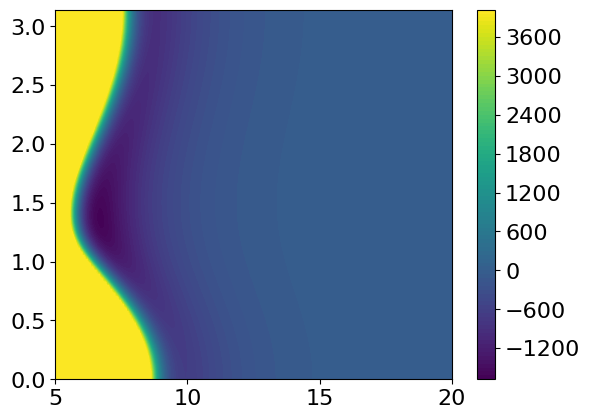

In [6]:
potential = ForceField.theoretical()
fig, ax = potential.show()

propagte_scaled(f"ff", potential)

dipole scaling 0.2
j = 1, omega = 0


100%|██████████| 50/50 [00:21<00:00,  2.36it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:20<00:00,  2.38it/s]


dipole scaling 0.5
j = 1, omega = 0


100%|██████████| 50/50 [00:21<00:00,  2.38it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


dipole scaling 2
j = 1, omega = 0


100%|██████████| 50/50 [00:21<00:00,  2.38it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:21<00:00,  2.37it/s]


dipole scaling 5
j = 1, omega = 0


100%|██████████| 50/50 [00:21<00:00,  2.37it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


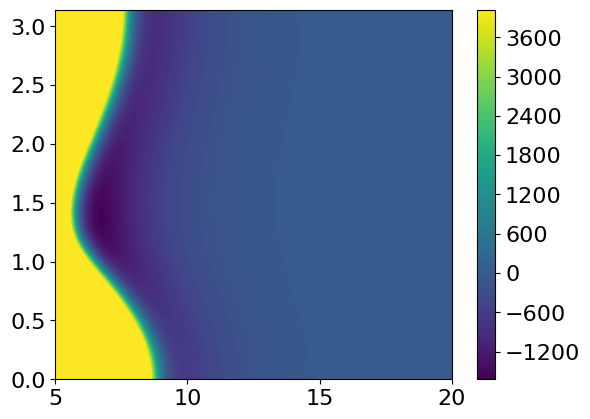

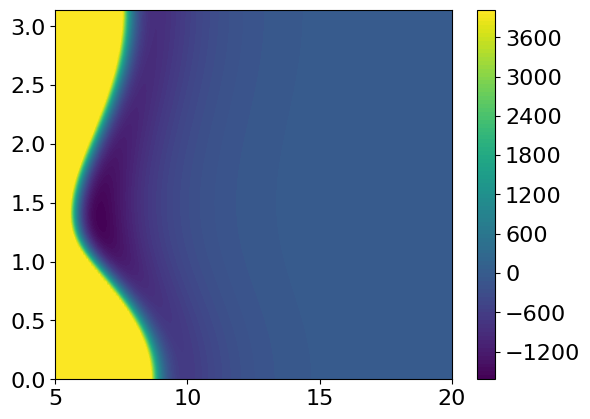

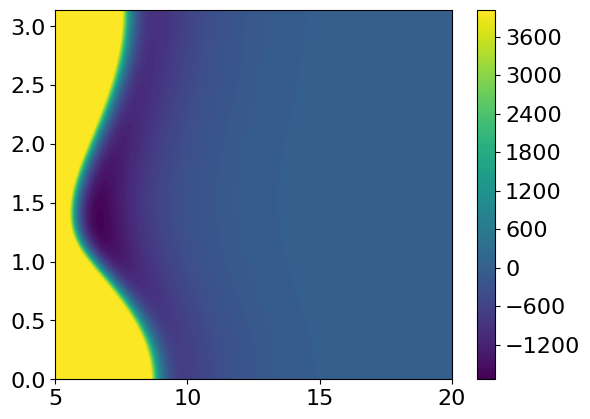

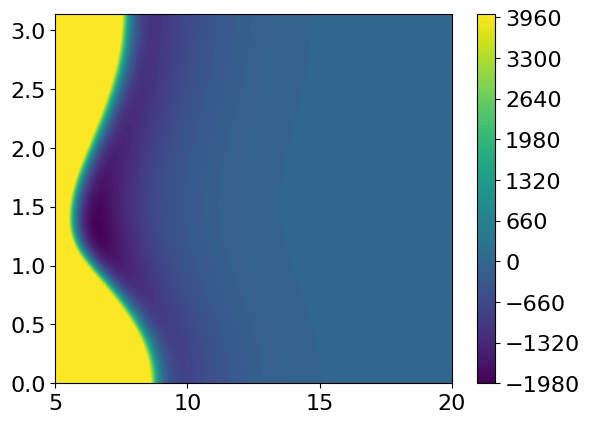

In [7]:
for scaling in scalings:
    print("dipole scaling", scaling)
    potential = ForceField.theoretical()
    potential.alpha *= scaling
    fig, ax = potential.show()

    propagte_scaled(f"ff_dipole_scaling_{scaling}", potential)


repulsive O scaling 0.2
j = 1, omega = 0


100%|██████████| 50/50 [00:21<00:00,  2.38it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


repulsive O scaling 0.5
j = 1, omega = 0


100%|██████████| 50/50 [00:20<00:00,  2.41it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


repulsive O scaling 2
j = 1, omega = 0


100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:20<00:00,  2.41it/s]


repulsive O scaling 5
j = 1, omega = 0


100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:21<00:00,  2.38it/s]


repulsive C scaling 0.2
j = 1, omega = 0


100%|██████████| 50/50 [00:21<00:00,  2.37it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:21<00:00,  2.35it/s]


repulsive C scaling 0.5
j = 1, omega = 0


100%|██████████| 50/50 [00:21<00:00,  2.37it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


repulsive C scaling 2
j = 1, omega = 0


100%|██████████| 50/50 [00:20<00:00,  2.41it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


repulsive C scaling 5
j = 1, omega = 0


100%|██████████| 50/50 [00:20<00:00,  2.38it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


repulsive S scaling 0.2
j = 1, omega = 0


100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


repulsive S scaling 0.5
j = 1, omega = 0


100%|██████████| 50/50 [00:21<00:00,  2.38it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


repulsive S scaling 2
j = 1, omega = 0


100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:21<00:00,  2.38it/s]


repulsive S scaling 5
j = 1, omega = 0


100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:20<00:00,  2.38it/s]


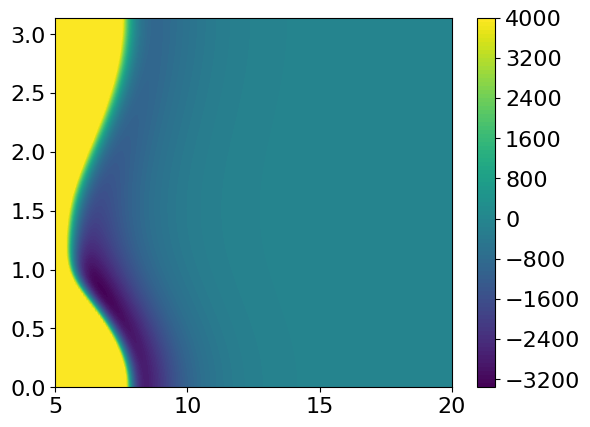

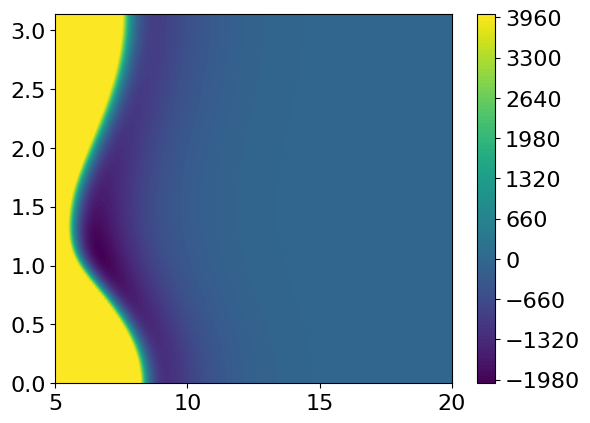

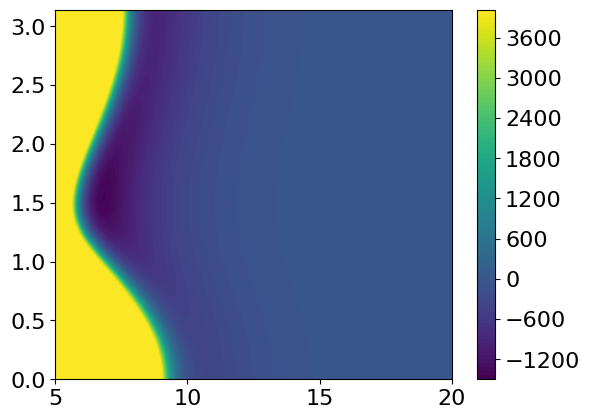

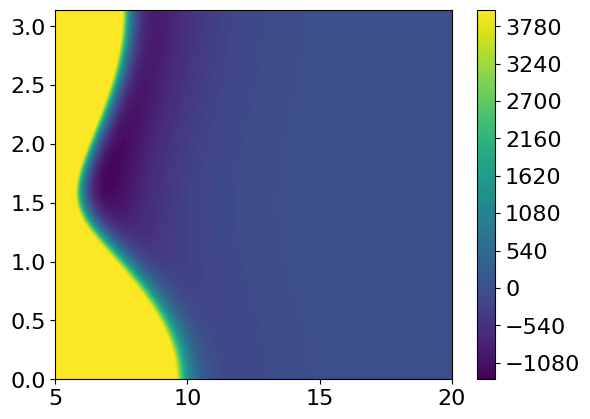

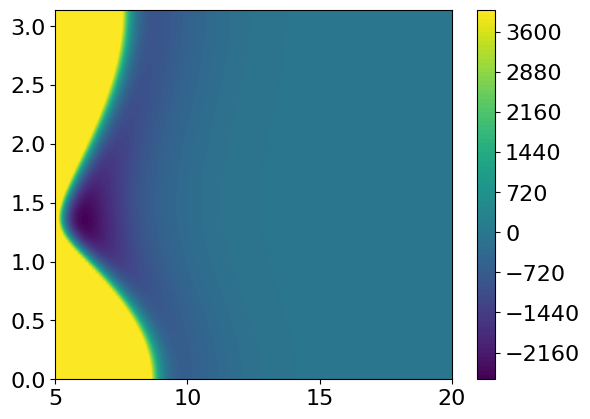

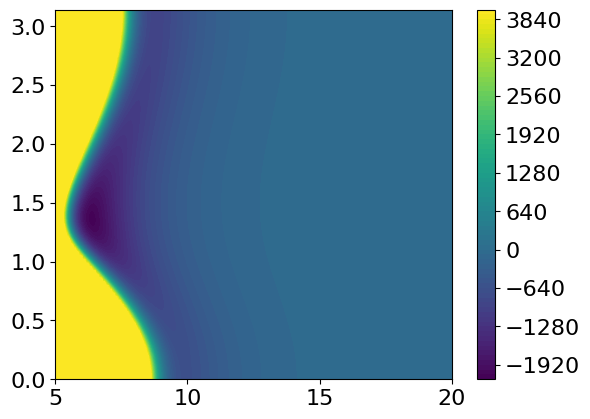

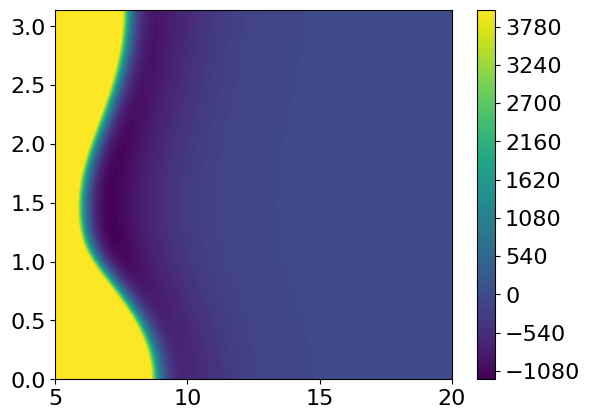

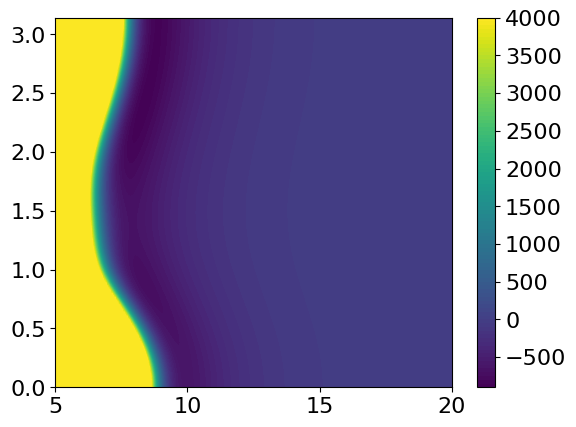

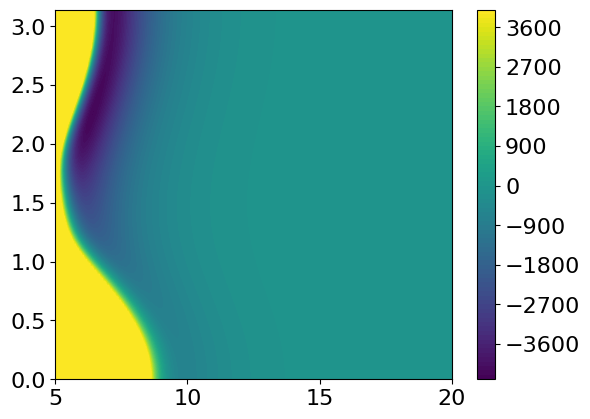

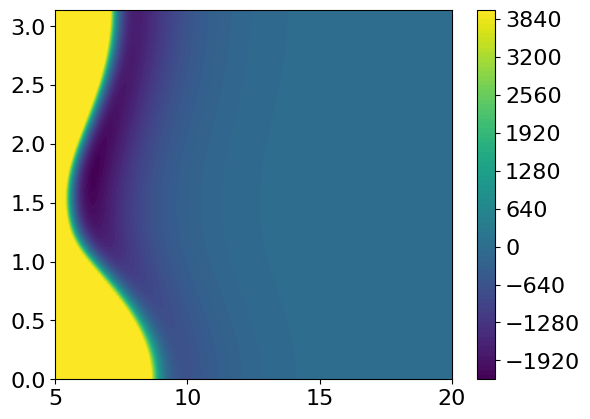

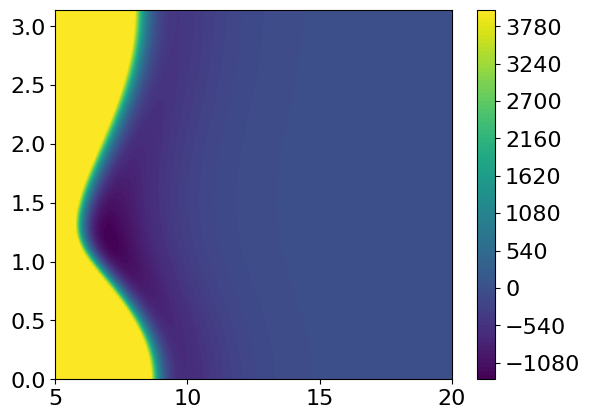

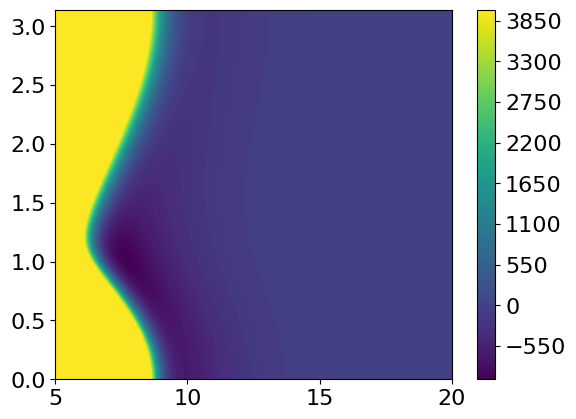

In [8]:
for scaling in scalings:
    print("repulsive O scaling", scaling)
    potential = ForceField.theoretical()
    potential.rep_o *= scaling
    fig, ax = potential.show()

    propagte_scaled(f"ff_rep_o_scaling_{scaling}", potential)

for scaling in scalings:
    print("repulsive C scaling", scaling)
    potential = ForceField.theoretical()
    potential.rep_c *= scaling
    fig, ax = potential.show()

    propagte_scaled(f"ff_rep_c_scaling_{scaling}", potential)

for scaling in scalings:
    print("repulsive S scaling", scaling)
    potential = ForceField.theoretical()
    potential.rep_s *= scaling
    fig, ax = potential.show()

    propagte_scaled(f"ff_rep_s_scaling_{scaling}", potential)


attractive O scaling 0.2
j = 1, omega = 0


100%|██████████| 50/50 [00:21<00:00,  2.38it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:20<00:00,  2.40it/s]


attractive O scaling 0.5
j = 1, omega = 0


100%|██████████| 50/50 [00:20<00:00,  2.40it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:21<00:00,  2.35it/s]


attractive O scaling 2
j = 1, omega = 0


100%|██████████| 50/50 [00:20<00:00,  2.38it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:21<00:00,  2.38it/s]


attractive O scaling 5
j = 1, omega = 0


100%|██████████| 50/50 [00:21<00:00,  2.37it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:21<00:00,  2.37it/s]


attractive C scaling 0.2
j = 1, omega = 0


100%|██████████| 50/50 [00:20<00:00,  2.38it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:21<00:00,  2.34it/s]


attractive C scaling 0.5
j = 1, omega = 0


100%|██████████| 50/50 [00:21<00:00,  2.31it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:21<00:00,  2.38it/s]


attractive C scaling 2
j = 1, omega = 0


100%|██████████| 50/50 [00:21<00:00,  2.34it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:21<00:00,  2.30it/s]


attractive C scaling 5
j = 1, omega = 0


100%|██████████| 50/50 [00:21<00:00,  2.35it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:21<00:00,  2.33it/s]


attractive S scaling 0.2
j = 1, omega = 0


100%|██████████| 50/50 [00:21<00:00,  2.31it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:21<00:00,  2.30it/s]


attractive S scaling 0.5
j = 1, omega = 0


100%|██████████| 50/50 [00:21<00:00,  2.35it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:21<00:00,  2.35it/s]


attractive S scaling 2
j = 1, omega = 0


100%|██████████| 50/50 [00:21<00:00,  2.32it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:21<00:00,  2.34it/s]


attractive S scaling 5
j = 1, omega = 0


100%|██████████| 50/50 [00:21<00:00,  2.36it/s]


j = 1, omega = 1


100%|██████████| 50/50 [00:21<00:00,  2.35it/s]


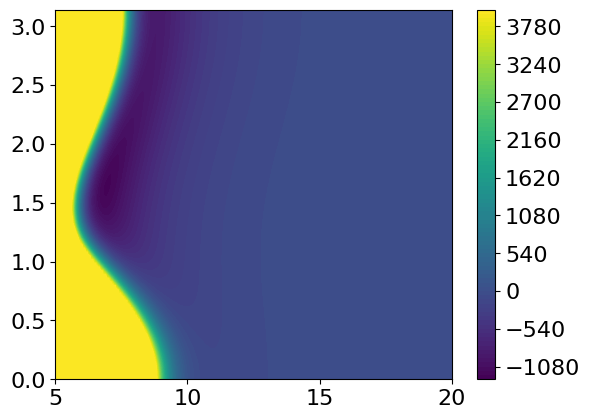

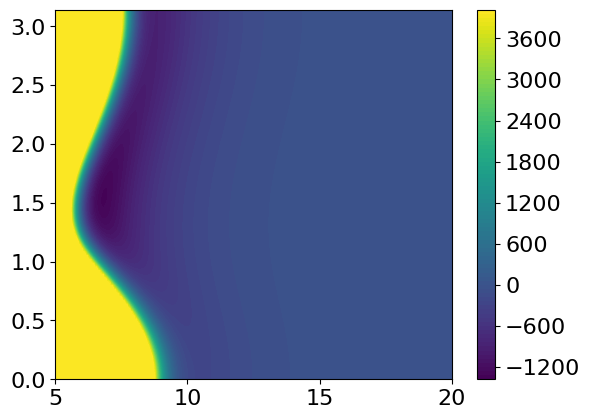

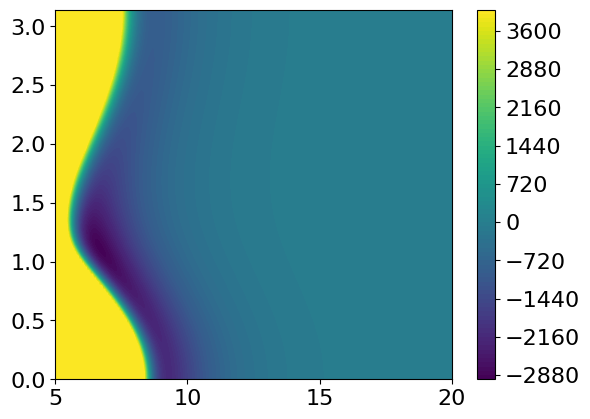

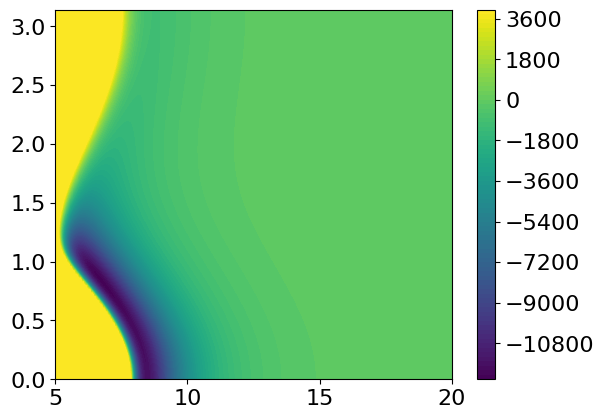

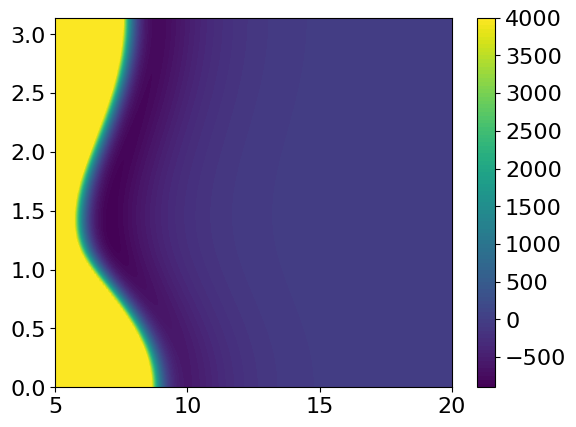

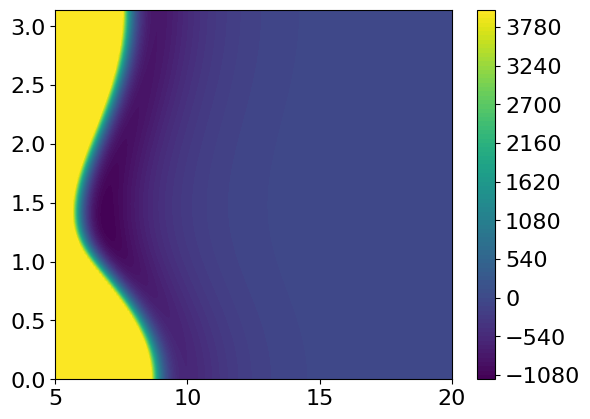

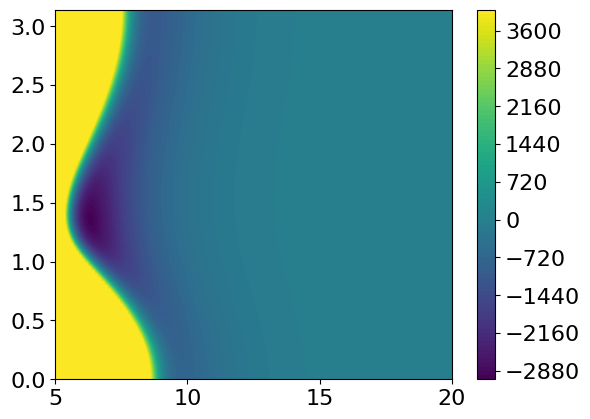

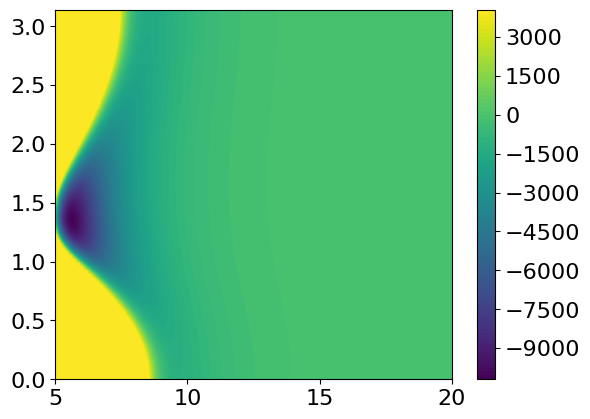

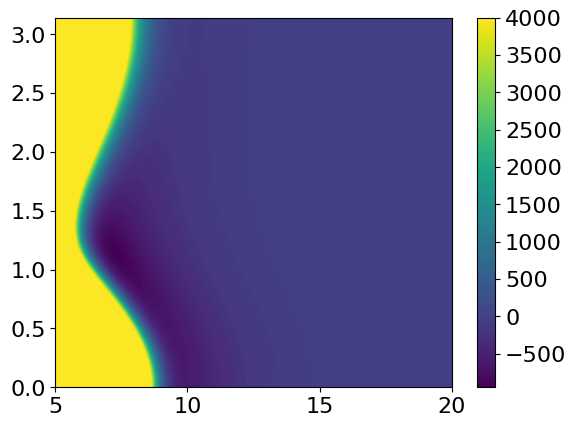

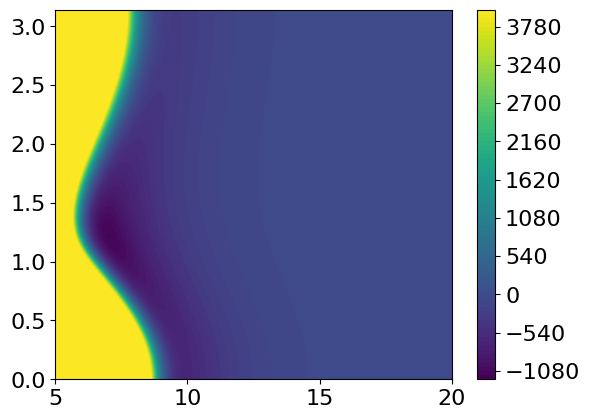

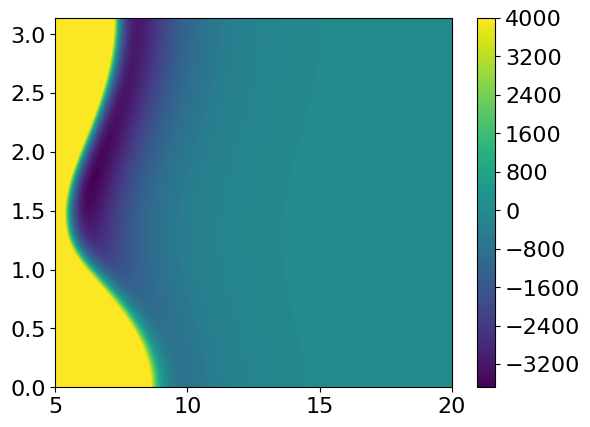

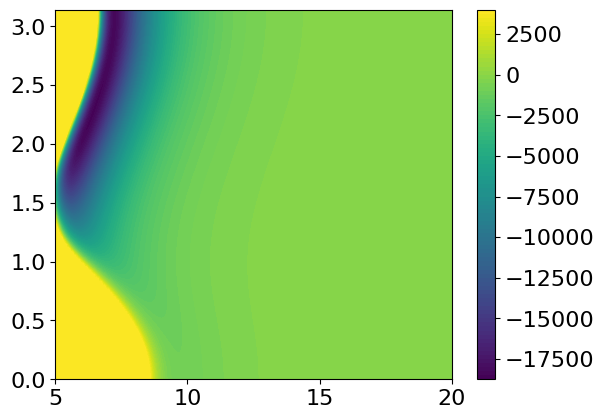

In [9]:
for scaling in scalings:
    print("attractive O scaling", scaling)
    potential = ForceField.theoretical()
    potential.attr_o *= scaling
    fig, ax = potential.show()

    propagte_scaled(f"ff_attr_o_scaling_{scaling}", potential)

for scaling in scalings:
    print("attractive C scaling", scaling)
    potential = ForceField.theoretical()
    potential.attr_c *= scaling
    fig, ax = potential.show()

    propagte_scaled(f"ff_attr_c_scaling_{scaling}", potential)

for scaling in scalings:
    print("attractive S scaling", scaling)
    potential = ForceField.theoretical()
    potential.attr_s *= scaling
    fig, ax = potential.show()

    propagte_scaled(f"ff_attr_s_scaling_{scaling}", potential)
